In [65]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [66]:
image = cv2.imread("result.jpg",1)

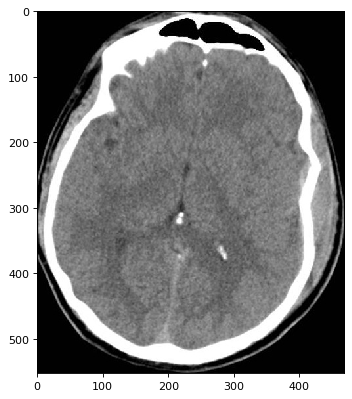

In [67]:
plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(image);

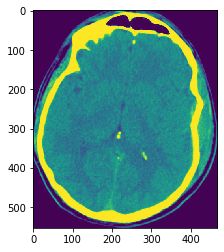

In [68]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

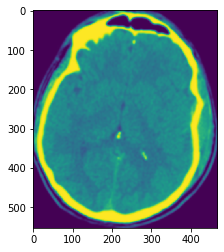

In [69]:
blurred = cv2.GaussianBlur(gray,(11,11),0)
plt.imshow(blurred)

In [70]:
mid_x , mid_y = image.shape[1]/2 , image.shape[0]/2 

In [71]:
print(mid_x , mid_y)

234.5 276.5


In [72]:
result = []

In [83]:
boundary = 0.5

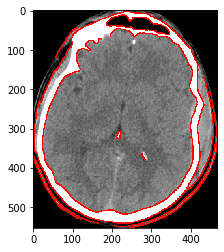

In [84]:
canny = cv2.Canny(blurred,10,250)
(cnts,_) = cv2.findContours(canny.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
coints = image.copy()
frame = image.copy()
cv2.drawContours(frame,cnts,-1,(255,0,0),2)
plt.imshow(frame);

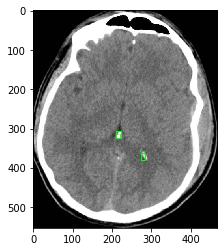

In [85]:

for cnt in cnts:
    x ,y,w,h = cv2.boundingRect(cnt)
    if (x+w) > (mid_x * boundary) and (x+w) < (mid_x * (2-boundary)) and (y+h) > (mid_y *boundary) and (y+h) <(mid_y* (2-boundary)):
        cv2.rectangle(coints,(x,y),(x+w,y+h),(0,255,0),2)
        result.append((x ,y,w,h))
plt.imshow(coints);

In [76]:
if len(result) > 0:
    print("Postive")
else:
    print("Negative")

Postive
